In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
from ipywidgets import widgets
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import auc
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from imblearn.metrics import sensitivity_specificity_support

Survived: 1103908
Died: 157125
Proportion: 7.03 : 1


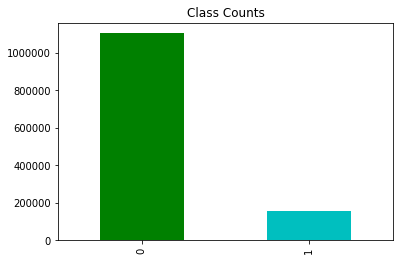

In [41]:
# Importing the dataset
dataset = pd.read_csv('11_Updated_Data.csv')
X = dataset.drop(['Record','IndDea','Age','Age_Cat35','HispOr','Educ_CollgCompl','NotInPoverty','Res_Pacific'], axis=1)
y = dataset.loc[:, 'IndDea']
IndDea = dataset.IndDea.value_counts()
print('Survived:', IndDea[0])
print('Died:', IndDea[1])
print('Proportion:', round(IndDea[0] / IndDea[1], 2), ': 1')
my_colors = 'gcbykm'
IndDea.plot(kind='bar', title='Class Counts', color=my_colors)

In [13]:
# Splitting the dataset into the Training set and Test set prior to fitting / resampling
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Identify statistically significant variables 
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 IndDea   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 08 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:33:58   Log-Likelihood:            -1.2924e+05
No. Observations:             1008826   AIC:                         2.585e+05
Df Residuals:                 1008795   BIC:                         2.589e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Age_Cat21     1.176e-19   2.44e-21     48.235      0.000    1.13e-19    1.22e-19
Age_Cat45        0.0225      0.001     28.971      0.000       0.021       0.024
Age_Cat55        0.0687      0.001     79.137      0.000       0.067       0.070
Age_Cat65        0.1609      0.001    169.194      0.000       0.159       0.163
Age_Cat75        0.3217      0.001    294.451      0.000       0.320       0.324
Age_Cat85        0.5706      0.001    398.096      0.000       0.568       0.573
Age_Cat86Pl      0.7464      0.003    267.857      0.000       0.741       0.752
Race            -0.0251      0.001    -31.071      0.000      -0.027      -0.024
Sex              0.0483      0.001     75.160      0.000       0.047       0.050
MarStat         -0.0263      0.001    -42.347      0.000      -0.027      -0.025
Educ_Elem        0.0395      0.001     35.581      0.000       0.037       0.042
Educ_HS          0.0232      0.001     21.999      0.000       0.021       0.025
Educ_HSCompl     0.0051      0.001      6.650      0.000       0.004       0.007
Educ_Collg      -0.0009      0.001     -1.020      0.308      -0.003       0.001
PlofBirth        0.0187      0.001     22.294      0.000       0.017       0.020
Urban           -0.0055      0.001     -9.825      0.000      -0.007      -0.004
SSNYN            0.0793      0.001    128.914      0.000       0.078       0.081
Vt               0.0215      0.001     24.681      0.000       0.020       0.023
Tenure          -0.0161      0.001    -24.255      0.000      -0.017      -0.015
InPoverty        0.0048      0.001      4.716      0.000       0.003       0.007
Poverty_Gr2      0.0100      0.001     11.964      0.000       0.008       0.012
Poverty_Gr3      0.0027      0.001      3.441      0.001       0.001       0.004
Poverty_Gr4      0.0003      0.001      0.375      0.707      -0.001       0.002
Esr             -0.0533      0.001    -82.732      0.000      -0.055      -0.052
Res_NewEng      -0.0029      0.001     -2.375      0.018      -0.005      -0.001
Res_MidAtl      -0.0066      0.001     -6.404      0.000      -0.009      -0.005
Res_ENCentr     -0.0043      0.001     -4.224      0.000      -0.006      -0.002
Res_WNCentr     -0.0132      0.001    -11.459      0.000      -0.015      -0.011
Res_SAtl        -0.0042      0.001     -4.268      0.000      -0.006      -0.002
Res_ESCentr     -0.0025      0.001     -1.787      0.074      -0.005       0.000
Res_WSCentr     -0.0057      0.001     -4.882      0.000      -0.008      -0.003
Res_Mountain    -0.0111      0.001     -9.818      0.000      -0.013      -0.009
==============================================================================
Omnibus:                   292695.855   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           895777.635
Skew:      

0.81203931691
[[179048  41536]
 [  5869  25754]]
[[ 0.81169985  0.18830015]
 [ 0.18559276  0.81440724]]
(0.81203931691031572, 0.81406776963366922, None)
0.81440723524


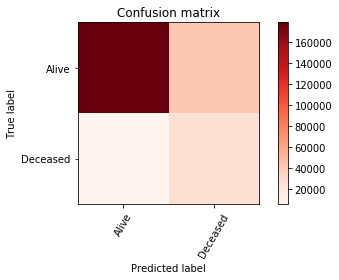

In [30]:
#Logistic Regression with balanced classes
logreg = LogisticRegression(C=1, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Reds')
    plt.colorbar()
    target_names = ['Alive', 'Deceased']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
plot_confusion(cm)
print(cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
print(sensitivity_specificity_support(y_test, y_pred, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(recall_score(y_test, y_pred)) #The recall score is the ability of the classifier to find all the positive samples

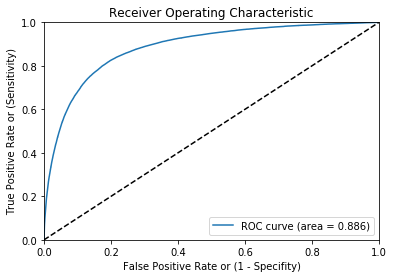

In [16]:
# Plotting ROC curve for logistic regression model
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:5]
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_proba)

[[188786  31798]
 [  9975  21648]]
[[ 0.8558463   0.1441537 ]
 [ 0.31543497  0.68456503]]
(0.83437018005051411, 0.70604115064575779, None)
0.684565031781


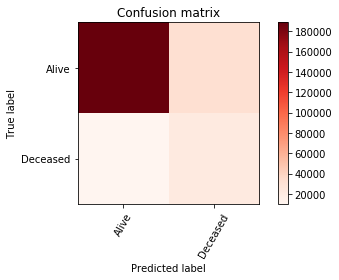

In [17]:
# Random Forest Classifier with balanced classes
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12, class_weight='balanced')
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Reds')
    plt.colorbar()
    target_names = ['Alive', 'Deceased']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
plot_confusion(cm)
print(cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
print(sensitivity_specificity_support(y_test, y_pred_rf, average='weighted'))
print(recall_score(y_test, y_pred_rf))

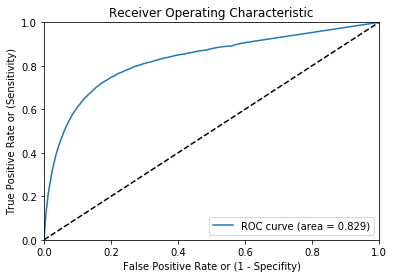

In [18]:
# Plotting ROC curve for random forest classifier model
y_pred_proba_rf = clf_rf.predict_proba(X_test)
y_pred_proba_rf[:5]
def plot_roc_curve(y_test, y_pred_proba_rf):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_proba_rf)

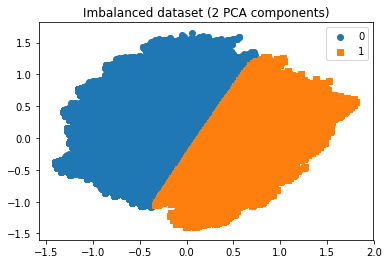

[[134318  86266]
 [ 12754  18869]]
[[ 0.60891996  0.39108004]
 [ 0.40331404  0.59668596]]
(0.60738599642357272, 0.59821991793040796, None)
0.596685956424


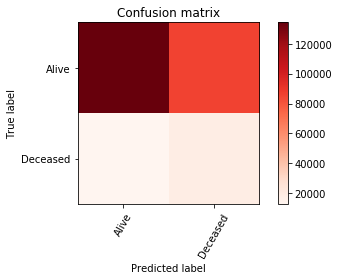

In [19]:
# Principal Component Analysis (PCA) Model + Logistic Regression with balanced classes
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight='balanced')
logisticRegr.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr.predict(X_test_pca)
def plot_2d_space(X_test_pca, y_pred_pca, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y_pred_pca), colors, markers):
        plt.scatter(
            X_test_pca[y_pred_pca==l, 0],
            X_test_pca[y_pred_pca==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
plot_2d_space(X_test_pca, y_pred_pca, 'Imbalanced dataset (2 PCA components)')
accuracy_score(y_test, y_pred_pca)
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Reds')
    plt.colorbar()
    target_names = ['Alive', 'Deceased']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
plot_confusion(cm)
print(cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
print(sensitivity_specificity_support(y_test, y_pred_pca, average='weighted'))
print(recall_score(y_test, y_pred_pca))

In [ ]:
# Pipeline Model: Synthetic Minority Oversampling(SMOTE) + Principal Component Analysis(PCA) + K-Nearest Neighbours(KNN) Methods
pca = PCA()
smt = SMOTE(random_state=42)
knn = KNN()
pipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])
pipeline.fit(X_train, y_train) 
y_pred_ppl = pipeline.predict(X_test)
accuracy_score(y_test, y_pred_ppl)
cm = confusion_matrix(y_test, y_pred_ppl)
print(cm)
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Reds')
    plt.colorbar()
    target_names = ['Alive', 'Deceased']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
plot_confusion(cm)
print(cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
print(sensitivity_specificity_support(y_test, y_pred_ppl, average='weighted'))
print(recall_score(y_test, y_pred_ppl))

In [ ]:
# Plotting ROC curve for Pipeline model
y_pred_proba_ppl = pipeline.predict_proba(X_test)
y_pred_proba_ppl[:5]
def plot_roc_curve(y_test, y_pred_proba_ppl):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ppl[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_proba_ppl)

In [ ]:
# Resampling Data Set: SMOTETomek (Over + Under Sampling) + Logistic Regression
print('Original dataset shape {}'.format(Counter(y_train)))
smt = SMOTETomek(ratio='auto')
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_smt)))
logreg = LogisticRegression(C=1)
logreg.fit(X_train_smt, y_train_smt)
y_pred_smt = logreg.predict(X_test)
accuracy_score(y_test, y_pred_smt)
cm = confusion_matrix(y_test, y_pred_smt)
print(cm)
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Reds')
    plt.colorbar()
    target_names = ['survived', 'died']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
plot_confusion(cm)
print(cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
print(sensitivity_specificity_support(y_test, y_pred_smt, average='weighted'))
print(recall_score(y_test, y_pred_smt))

In [ ]:
# Plotting ROC curve for SMOTETomek + Logistic Regression Model
y_pred_smt_proba = logreg.predict_proba(X_test)
y_pred_smt_proba[:5]
def plot_roc_curve(y_test, y_pred_smt_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_smt_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_smt_proba)

In [ ]:
# Resampling Data Set: SMOTEENN (Over + Under Sampling) algorithm + Logistic Regression
sme = SMOTEENN(random_state=42)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)
#Saving resampled data to a csv file for later access
df_X = pd.DataFrame(X_train_sme)
df_X.to_csv("6c_ResampledData_X_train.csv", encoding='utf-8', index=False)
df_y = pd.DataFrame(y_train_sme)
df_y.to_csv("6c_ResampledData_y_train.csv", encoding='utf-8', index=False)
logreg = LogisticRegression(C=1)
logreg.fit(X_train_sme, y_train_sme)
y_pred_sme = logreg.predict(X_test)
accuracy_score(y_test, y_pred_sme)
cm = confusion_matrix(y_test, y_pred_sme)
print(cm)
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Reds')
    plt.colorbar()
    target_names = ['survived', 'died']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
plot_confusion(cm)
print(cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
print(sensitivity_specificity_support(y_test, y_pred_sme, average='weighted'))
print(recall_score(y_test, y_pred_sme))

In [ ]:
# Plotting ROC Curve for SMOTEENN + Logistic Regression Model
y_pred_sme_proba = logreg.predict_proba(X_test)
y_pred_sme_proba[:5]
def plot_roc_curve(y_test, y_pred_sme_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sme_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_sme_proba)

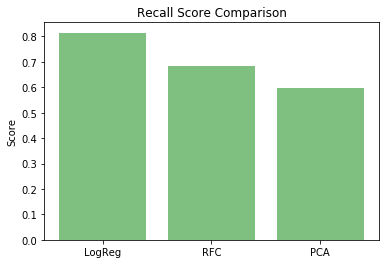

In [38]:
# Saving recall score (rs) of all models into a variable to plot the bar charts for comparison
lr_rs=recall_score(y_test, y_pred)
rfc_rs=recall_score(y_test, y_pred_rf)
ppl_rs=recall_score(y_test, y_pred_ppl)
pca_rs=recall_score(y_test, y_pred_pca)
smt_rs=recall_score(y_test, y_pred_smt)
sme_rs=recall_score(y_test, y_pred_sme)

objects = ('LR', 'RFC', 'PCA', 'PPL', 'SME', 'SMT')
y_pos = np.arange(len(objects))
performance = [lr_rs, rfc_rs, pca_rs]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Recall Score Comparison')
 
plt.show()

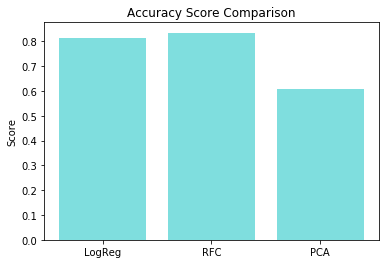

In [39]:
# Saving accurancy score (as) of all models into a variable to plot the bar charts for comparison
lr_as=accuracy_score(y_test, y_pred)
rfc_as=accuracy_score(y_test, y_pred_rf)
ppl_as=accuracy_score(y_test, y_pred_ppl)
pca_as=accuracy_score(y_test, y_pred_pca)
smt_as=accuracy_score(y_test, y_pred_smt)
sme_as=accuracy_score(y_test, y_pred_sme)

objects = ('LR', 'RFC', 'PCA', 'PPL', 'SME', 'SMT')
y_pos = np.arange(len(objects))
performance = [lr_as, rfc_as, pca_as]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='c')
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Accuracy Score Comparison')
 
plt.show()

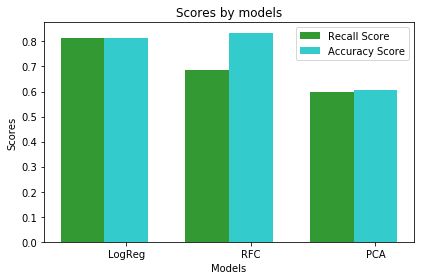

In [40]:
# Comparing Recall and Accuracy Scores for each model
n_groups = 3
rec_sc = [lr_rs, rfc_rs, pca_rs]
acc_sc = [lr_as, rfc_as, pca_as]
 
# Creating the plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, rec_sc, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Recall Score')
 
rects2 = plt.bar(index + bar_width, acc_sc, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Accuracy Score')
 
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Scores by models')
plt.xticks(index + bar_width, ('LR', 'RFC', 'PCA', 'PPL', 'SME', 'SMT'))
plt.legend()
 
plt.tight_layout()
plt.show()